In [ ]:
#!pip install tensorflow==2.7.0

In [ ]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
#!pip install tensorflow-gpu==2.8.0

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#Importing necessary library for classification
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

# import necessary libraries
import numpy as np
import PIL
import os
import cv2
import PIL
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import  image
from keras.models import Sequential

# **Understanding and Cleaning **

In [ ]:
import pathlib
data_dir = "/content/gdrive/MyDrive/Dataset"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total number of image from the Waether Dataset:"+str(image_count))

Total number of image from the Waether Dataset:1950


In [ ]:
!ls /content/gdrive/MyDrive/Dataset 

Cloudy	Foggy  Rain  Shine  Snowing  Sunries


In [ ]:
import pathlib
data_dir = "/content/gdrive/MyDrive/Dataset"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total number of image from the Waether Dataset:"+str(image_count))

Total number of image from the Waether Dataset:1950


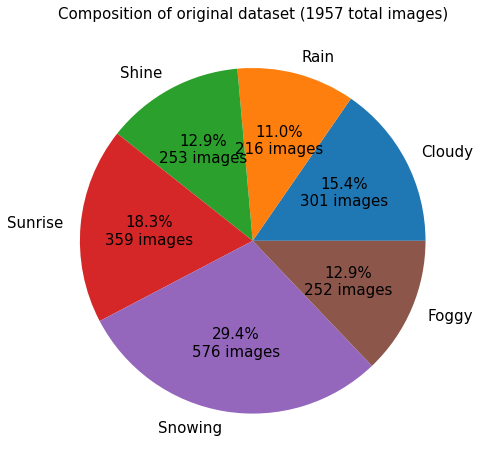

In [ ]:

# Check number of images for each type of weather condition
num_cloudy = len(os.listdir('/content/gdrive/MyDrive/Dataset/Cloudy'))
num_rain = len(os.listdir('/content/gdrive/MyDrive/Dataset/Rain'))
num_shine = len(os.listdir('/content/gdrive/MyDrive/Dataset/Shine'))
num_sunrise = len(os.listdir('/content/gdrive/MyDrive/Dataset/Sunries'))
num_foggy = len(os.listdir('/content/gdrive/MyDrive/Dataset/Foggy'))
num_Snowing = len(os.listdir('/content/gdrive/MyDrive//Dataset/Snowing'))

# Plot distribution of classes
def label_pie(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d} images".format(pct, absolute)

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
weather_conditions = ['Cloudy', 'Rain', 'Shine', 'Sunrise','Snowing','Foggy']
num_images = [num_cloudy,num_rain,num_shine,num_sunrise,num_Snowing,num_foggy]
ax.pie(num_images, labels = weather_conditions, autopct=lambda pct: label_pie(pct, num_images), textprops={'fontsize': 15})
plt.title('Composition of original dataset ({} total images)'.format(sum(num_images)), fontsize=15)
plt.show()

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#Train Set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1953 files belonging to 6 classes.
Using 1563 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1953 files belonging to 6 classes.
Using 390 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Cloudy', 'Foggy', 'Rain', 'Shine', 'Snowing', 'Sunries']


# **Data Analysis and Visualization**

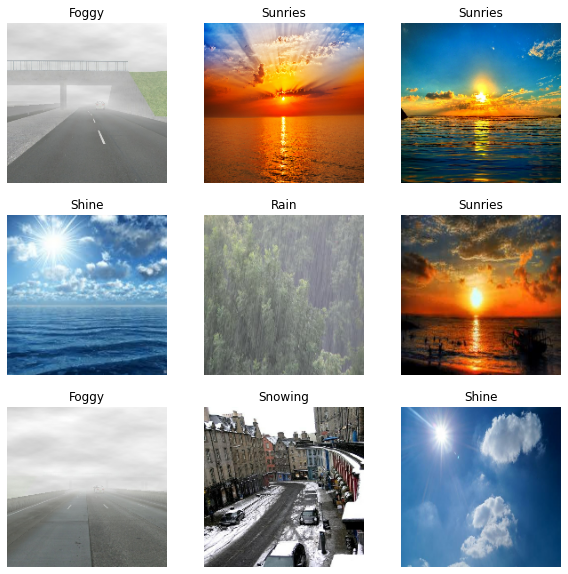

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

# ***Building Model***

In [ ]:
print(num_classes)

6


In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
!pip install --upgrade tensorflow-gpu==2.7.0

# ***Train the model***

In [ ]:
epochs=6
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/6
49/49 [==============================] - 49s 1s/step - loss: 0.9079 - accuracy: 0.6750 - val_loss: 0.5824 - val_accuracy: 0.7923
Epoch 2/6
49/49 [==============================] - 3s 61ms/step - loss: 0.4401 - accuracy: 0.8496 - val_loss: 0.3758 - val_accuracy: 0.8718
Epoch 3/6
49/49 [==============================] - 3s 61ms/step - loss: 0.3063 - accuracy: 0.8836 - val_loss: 0.3910 - val_accuracy: 0.8564
Epoch 4/6
49/49 [==============================] - 3s 61ms/step - loss: 0.2309 - accuracy: 0.9168 - val_loss: 0.4793 - val_accuracy: 0.8436
Epoch 5/6
49/49 [==============================] - 3s 62ms/step - loss: 0.1955 - accuracy: 0.9309 - val_loss: 0.3465 - val_accuracy: 0.8462
Epoch 6/6
49/49 [==============================] - 3s 62ms/step - loss: 0.1381 - accuracy: 0.9559 - val_loss: 0.2820 - val_accuracy: 0.9051


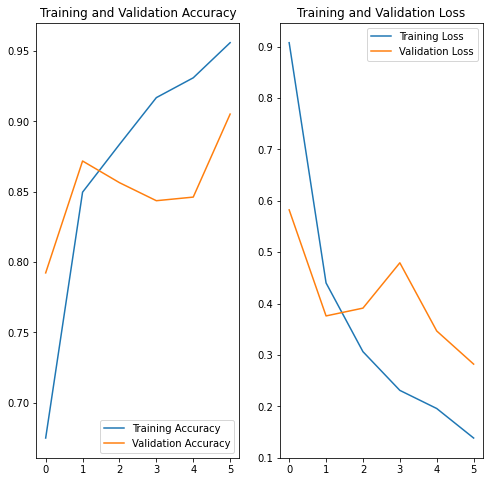

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

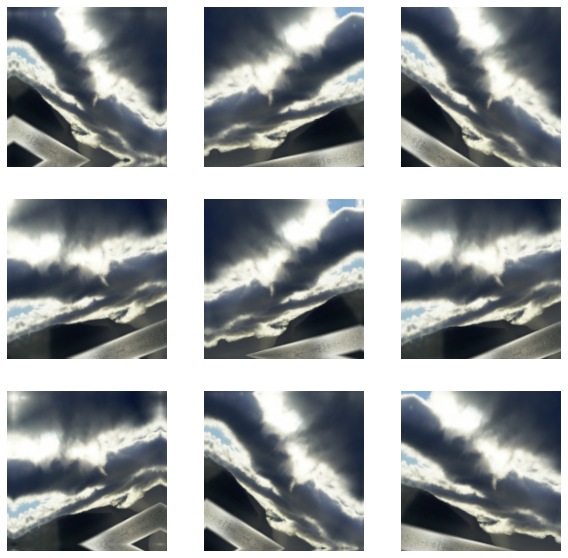

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
49/49 [==============================] - 5s 73ms/step - loss: 0.9468 - accuracy: 0.6232 - val_loss: 0.8388 - val_accuracy: 0.7205
Epoch 2/20
49/49 [==============================] - 3s 69ms/step - loss: 0.5777 - accuracy: 0.7895 - val_loss: 0.6190 - val_accuracy: 0.7949
Epoch 3/20
49/49 [==============================] - 3s 70ms/step - loss: 0.4447 - accuracy: 0.8343 - val_loss: 0.4673 - val_accuracy: 0.8436
Epoch 4/20
49/49 [==============================] - 3s 69ms/step - loss: 0.3781 - accuracy: 0.8605 - val_loss: 0.7185 - val_accuracy: 0.8128
Epoch 5/20
49/49 [==============================] - 3s 69ms/step - loss: 0.3658 - accuracy: 0.8765 - val_loss: 0.4463 - val_accuracy: 0.8615
Epoch 6/20
49/49 [==============================] - 3s 70ms/step - loss: 0.3524 - accuracy: 0.8714 - val_loss: 0.5768 - val_accuracy: 0.8385
Epoch 7/20
49/49 [==============================] - 3s 70ms/step - loss: 0.2840 - accuracy: 0.9021 - val_loss: 0.5500 - val_accuracy: 0.8333
Epoch 8/20
49

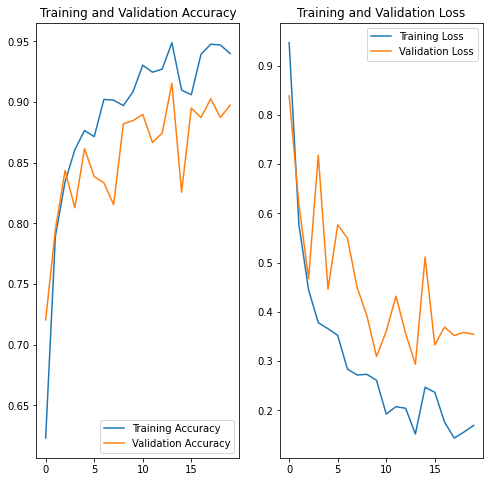

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# ***5. Evaluate the model[5]:***


# ***Results and Prediction[5***

In [ ]:

from tensorflow.python.keras import layers
from keras.preprocessing import  image
from tensorflow.python.keras.models import Sequential

In [ ]:
img = image.load_img('/content/gdrive/MyDrive/Dataset/Cloudy/cloudy4.jpg', target_size=(img_height,img_width))
image_test = image.img_to_array(img)
test_img = np.expand_dims(image_test,1)

result = model.predict(test_img)
pred = np.argmax(result) # get the index of max value

if pred == 0:
    print('The test image is of ' + class_names[0])
elif pred == 1:
    print('The test image is of ' + class_names[1])
elif pred == 2:
    print('The test image is of ' + class_names[2])
elif pred == 3:
    print('The test image is of ' + class_names[3])
elif pred == 4:
  print('The test image is of ' + class_names[4])
elif pred == 5:
  print('The test image is of ' + class_names[5])
else:
  print('The test image is of ' + class_names[6])

ValueError: ignored

In [ ]:
import cv2
IMAGE_CHANNEL = 1
def prepare(filepath):
    IMG_SIZE = 112
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

x = tf.keras.Input(shape=(112,112,IMAGE_CHANNEL))
y = tf.keras.layers.Dense(16, activation='softmax')(x)
model = tf.keras.Model(x, y)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 1)]     0         
                                                                 
 dense_7 (Dense)             (None, 112, 112, 16)      32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


43588


In [ ]:

if pred == 0:
    print('The test image is of ' + class_names[0])
elif pred == 1:
    print('The test image is of ' + class_names[1])
elif pred == 2:
    print('The test image is of ' + class_names[2])
elif pred == 3:
    print('The test image is of ' + class_names[3])
elif pred == 4:
  print('The test image is of ' + class_names[4])
else:
  print('The test image is of ' + class_names[5])


The test image is of Sunries
